In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine
import seaborn as sns
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houseprices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


In [3]:
display(houseprices_df.head(10))

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [4]:
print(houseprices_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [5]:
display(houseprices_df.describe())

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [6]:
houseprices_df.isnull().sum()

id                  0
mssubclass          0
mszoning            0
lotfrontage       259
lotarea             0
street              0
alley            1369
lotshape            0
landcontour         0
utilities           0
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
overallqual         0
overallcond         0
yearbuilt           0
yearremodadd        0
roofstyle           0
roofmatl            0
exterior1st         0
exterior2nd         0
masvnrtype          8
masvnrarea          8
exterqual           0
extercond           0
foundation          0
                 ... 
bedroomabvgr        0
kitchenabvgr        0
kitchenqual         0
totrmsabvgrd        0
functional          0
fireplaces          0
fireplacequ       690
garagetype         81
garageyrblt        81
garagefinish       81
garagecars          0
garagearea          0
garagequal         81
garagecond         81
paveddrive

In [7]:
#finding our object and numeric columns
non_object = houseprices_df.select_dtypes(exclude=['object']).columns
object_columns = houseprices_df.select_dtypes(['object']).columns
print(non_object)
print(object_columns)

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')
Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'he

In [8]:
sum_null = houseprices_df.isnull().sum().sort_values(ascending=False)
percent_null = (houseprices_df.isnull().sum()/ len(houseprices_df)).sort_values(ascending=False)
print(sum_null, '\n', percent_null)

poolqc           1453
miscfeature      1406
alley            1369
fence            1179
fireplacequ       690
lotfrontage       259
garagecond         81
garagetype         81
garageyrblt        81
garagefinish       81
garagequal         81
bsmtexposure       38
bsmtfintype2       38
bsmtfintype1       37
bsmtcond           37
bsmtqual           37
masvnrarea          8
masvnrtype          8
electrical          1
utilities           0
yearremodadd        0
mssubclass          0
foundation          0
extercond           0
exterqual           0
exterior2nd         0
exterior1st         0
roofmatl            0
roofstyle           0
yearbuilt           0
                 ... 
garagearea          0
paveddrive          0
wooddecksf          0
openporchsf         0
threessnporch       0
bsmtunfsf           0
screenporch         0
poolarea            0
miscval             0
mosold              0
yrsold              0
saletype            0
functional          0
totrmsabvgrd        0
kitchenqua

Since there are only 19 out of 81 columns that are null so we'll do our analysis without those variables.

Text(0.5, 1.0, '')

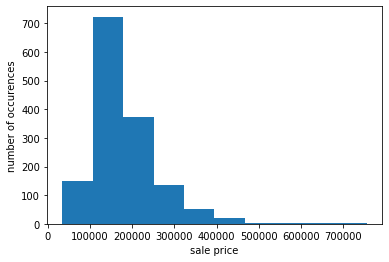

In [9]:
#exploring saleprice
plt.hist(houseprices_df.saleprice)
plt.xlabel('sale price')
plt.ylabel('number of occurences')
plt.title('')

In [10]:
for col in non_object:
    q75, q25 = np.percentile(houseprices_df[col], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and %{}".format(col,
                                                                             len((np.where((houseprices_df[col] > max_val) | 
                                                                                           (houseprices_df[col] < min_val))[0])),len((np.where((houseprices_df[col] > max_val) | 
                                                                                           (houseprices_df[col] < min_val))[0]))*100/1460))

Number of outliers and percentage of it in id : 0 and %0.0
Number of outliers and percentage of it in mssubclass : 103 and %7.054794520547945
Number of outliers and percentage of it in lotfrontage : 0 and %0.0
Number of outliers and percentage of it in lotarea : 69 and %4.726027397260274
Number of outliers and percentage of it in overallqual : 2 and %0.136986301369863
Number of outliers and percentage of it in overallcond : 125 and %8.561643835616438
Number of outliers and percentage of it in yearbuilt : 7 and %0.4794520547945205
Number of outliers and percentage of it in yearremodadd : 0 and %0.0
Number of outliers and percentage of it in masvnrarea : 0 and %0.0
Number of outliers and percentage of it in bsmtfinsf1 : 7 and %0.4794520547945205
Number of outliers and percentage of it in bsmtfinsf2 : 167 and %11.438356164383562
Number of outliers and percentage of it in bsmtunfsf : 29 and %1.9863013698630136
Number of outliers and percentage of it in totalbsmtsf : 61 and %4.1780821917808

In [11]:
# looking at correlation of continuous variables compared to our target variable of saleprice
print(houseprices_df[non_object].iloc[:, 1:].corr(
).loc[:, 'saleprice'].sort_values(ascending=False)
)

top_ten = houseprices_df[['saleprice', 'overallqual', 'grlivarea', 'garagecars',
                          'garagearea', 'totalbsmtsf', 'firstflrsf', 'fullbath',
                          'totrmsabvgrd', 'yearbuilt', 'yearremodadd']]



saleprice        1.000
overallqual      0.791
grlivarea        0.709
garagecars       0.640
garagearea       0.623
totalbsmtsf      0.614
firstflrsf       0.606
fullbath         0.561
totrmsabvgrd     0.534
yearbuilt        0.523
yearremodadd     0.507
garageyrblt      0.486
masvnrarea       0.477
fireplaces       0.467
bsmtfinsf1       0.386
lotfrontage      0.352
wooddecksf       0.324
secondflrsf      0.319
openporchsf      0.316
halfbath         0.284
lotarea          0.264
bsmtfullbath     0.227
bsmtunfsf        0.214
bedroomabvgr     0.168
screenporch      0.111
poolarea         0.092
mosold           0.046
threessnporch    0.045
bsmtfinsf2      -0.011
bsmthalfbath    -0.017
miscval         -0.021
lowqualfinsf    -0.026
yrsold          -0.029
overallcond     -0.078
mssubclass      -0.084
enclosedporch   -0.129
kitchenabvgr    -0.136
Name: saleprice, dtype: float64


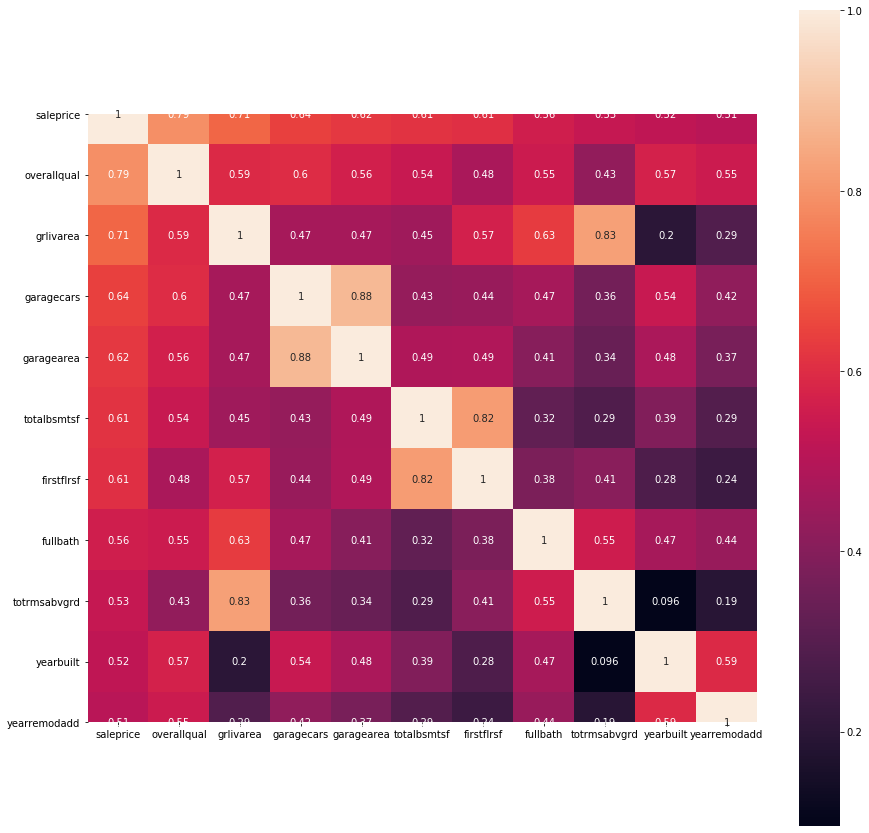

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(top_ten.corr(), square=True, annot=True)
#looking at our top ten correlated variables, we can see that only garagecars and garagearea
#have really strong correlation with each other so we'll drop garagearea

In [13]:
top_five = houseprices_df[['saleprice', 
                           'overallqual', 
                           'grlivarea', 
                           'garagecars',
                           'totalbsmtsf']]

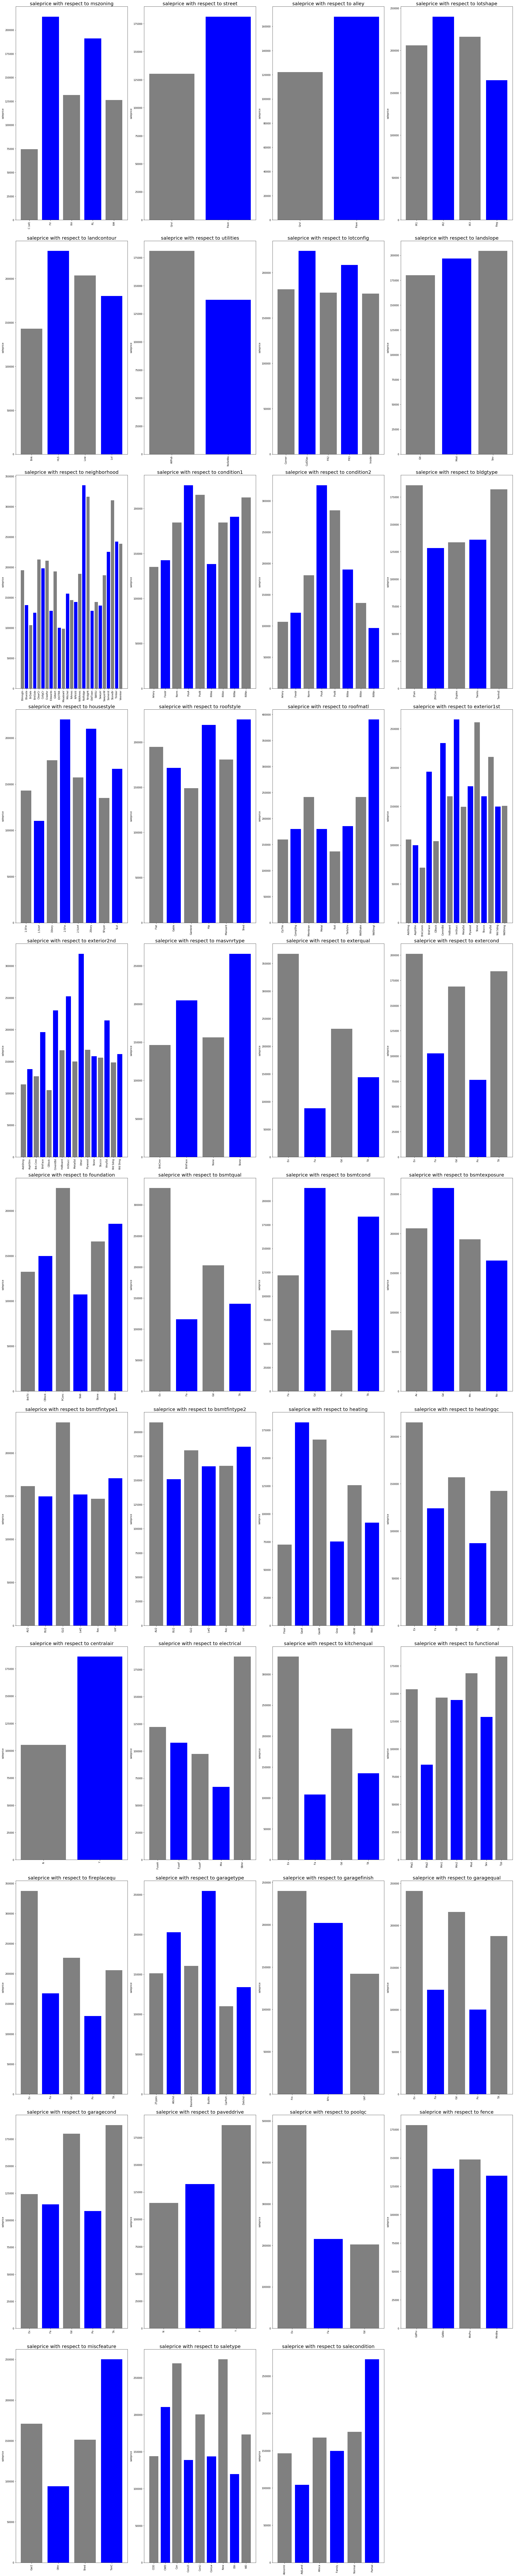

In [14]:
# take a look at our object variables
plt.figure(figsize=(30, 150))
for i, col in enumerate(object_columns):
    plt.subplot(11, 4, i+1)
    plt.bar(houseprices_df.groupby(col)['saleprice'].mean(
    ).index, houseprices_df.groupby(col)['saleprice'].mean(), color=('grey', 'blue'))
    plt.ylabel('saleprice')
    plt.xticks(rotation='vertical')
    plt.title('saleprice with respect to {}'.format(col), fontsize=20)
    plt.tight_layout()

In [15]:
# street, utilities, and centralair all have a pretty big impact on saleprice so
# we'll get dummies and add them to the feature dataframe
houseprices_df['dummy_street'] = pd.get_dummies(houseprices_df['street'], prefix='street', drop_first=True)

houseprices_df['dummy_utilities'] = pd.get_dummies(houseprices_df['utilities'], prefix='utilities', drop_first=True)

houseprices_df['dummy_centralair'] = pd.get_dummies(houseprices_df['centralair'], prefix='centralair', drop_first=True)

In [16]:
X = houseprices_df[['overallqual',
                    'grlivarea',
                    'garagecars',
                    'totalbsmtsf',
                    'dummy_street',
                    'dummy_centralair']]

Y = houseprices_df['saleprice']

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()
# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [23054.90323995    46.42208823 18157.89932646    31.90731465
  4782.16589944 11767.57758888]

Intercept: 
 -111640.28558197469


In [17]:
lrm.fit(X,Y)
predictions = lrm.predict(X)
# we print the estimated coefficients
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)

errors = Y - predictions
print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))


Coefficients: 
 [23054.90323995    46.42208823 18157.89932646    31.90731465
  4782.16589944 11767.57758888]

Intercept: 
 -111640.28558197469
Mean of the errors in the medical costs model is: -4.544981742558414e-12


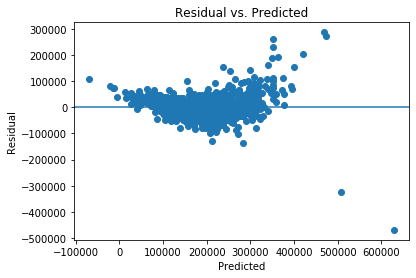

In [18]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [19]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 467.78 and p value is 9.75e-104
Levene test statistic value is 445.687 and p value is 3.49e-92


My model is heteroscedastic. Most likely due to normality issues and outliers in the dependent variables.

In [20]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     774.9
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:17:33   Log-Likelihood:                -17496.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1453   BIC:                         3.504e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.116e+05   1.64e+04     -6.819      0.000   -1.44e+05   -7.95e+04
overallqual       2.305e+04   1087.838     21.193      0.000    2.09e+04    2.52e+04
grlivarea           46.4221      2.498     18.583      0.000      41.522      51.322
garagecars        1.816e+04   1757.247     10.333      0.000    1.47e+04    2.16e+04
totalbsmtsf         31.9073      2.844     11.221      0.000      26.329      37.485
dummy_street      4782.1659    1.6e+04      0.299      0.765   -2.66e+04    3.62e+04
dummy_centralair  1.177e+04   4349.935      2.705      0.007    3234.755    2.03e+04
==============================================================================
Omnibus:                      416.222   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37343.690
Skew:                          -0.215   Prob(JB):                         0.00
Kurtosis:                      27.773   Cond. No.                     4.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

my dummy_street variable looks to have no statistical significance on this model so I'll run again without it.

In [21]:
X = houseprices_df[['overallqual',
                    'grlivarea',
                    'garagecars',
                    'totalbsmtsf',
                    'dummy_centralair']]

Y = houseprices_df['saleprice']

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()
# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)

import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()


Coefficients: 
 [23074.78865024    46.44884323 18118.61747627    31.88129585
 11856.01090517]

Intercept: 
 -107025.3562106239


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     930.5
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:17:33   Log-Likelihood:                -17496.
No. Observations:                1460   AIC:                         3.500e+04
Df Residuals:                    1454   BIC:                         3.504e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.07e+05   5434.238    -19.695      0.000   -1.18e+05   -9.64e+04
overallqual       2.307e+04   1085.461     21.258      0.000    2.09e+04    2.52e+04
grlivarea           46.4488      2.496     18.611      0.000      41.553      51.345
garagecars        1.812e+04   1751.774     10.343      0.000    1.47e+04    2.16e+04
totalbsmtsf         31.8813      2.841     11.221      0.000      26.308      37.455
dummy_centralair  1.186e+04   4338.497      2.733      0.006    3345.629    2.04e+04
==============================================================================
Omnibus:                      416.282   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37342.837
Skew:                          -0.216   Prob(JB):                         0.00
Kurtosis:                      27.772   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Overallqual and garagecars variables have the largest impact on our target in this model. the most significant change by removing that variable is that the condition number shrank noticeably.

I think that losing the if the street is paved variable makes sense when you take into account the other variables. I wasn't surprised that even though it has a high correlation with the target variable that it utltimately wouldn't have a statistically significant role in our model.

2. House prices model
In this exercise, you'll work on your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

Load the houseprices data from Thinkful's database.
Run your house prices model again and assess the goodness of fit of your model using F-test, R-squared, adjusted R-squared, AIC and BIC.
Do you think your model is satisfactory? If so, why?
In order to improve the goodness of fit of your model, try different model specifications by adding or removing some variables.
For each model you try, get the goodness of fit metrics and compare your models with each other. Which model is the best and why?

In [22]:
X = houseprices_df[['overallqual',
                    'grlivarea',
                    'garagecars',
                    'totalbsmtsf',
                    'dummy_centralair']]

Y = houseprices_df['saleprice']

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()
# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)

import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()


Coefficients: 
 [23074.78865024    46.44884323 18118.61747627    31.88129585
 11856.01090517]

Intercept: 
 -107025.3562106239


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     930.5
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:17:33   Log-Likelihood:                -17496.
No. Observations:                1460   AIC:                         3.500e+04
Df Residuals:                    1454   BIC:                         3.504e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.07e+05   5434.238    -19.695      0.000   -1.18e+05   -9.64e+04
overallqual       2.307e+04   1085.461     21.258      0.000    2.09e+04    2.52e+04
grlivarea           46.4488      2.496     18.611      0.000      41.553      51.345
garagecars        1.812e+04   1751.774     10.343      0.000    1.47e+04    2.16e+04
totalbsmtsf         31.8813      2.841     11.221      0.000      26.308      37.455
dummy_centralair  1.186e+04   4338.497      2.733      0.006    3345.629    2.04e+04
==============================================================================
Omnibus:                      416.282   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37342.837
Skew:                          -0.216   Prob(JB):                         0.00
Kurtosis:                      27.772   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at our original model we can see that the adj r-squared is saying that 76.1% of variance is being explained in this model. I will add a feature and see if it changes that at all. AIC and BIC are both pretty high and our f-stat shows that the model is indeed better than nothing.

In [23]:
import statsmodels.api as sm
X = houseprices_df[['overallqual',
                    'grlivarea',
                    'garagecars',
                    'totalbsmtsf',
                    'dummy_centralair',
                    'firstflrsf'
                    ]]

Y = houseprices_df['saleprice']

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()
# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()


Coefficients: 
 [2.34584837e+04 4.40466554e+01 1.77030469e+04 2.41131710e+01
 1.21426913e+04 1.20477392e+01]

Intercept: 
 -111051.64657254927


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     778.9
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:17:33   Log-Likelihood:                -17494.
No. Observations:                1460   AIC:                         3.500e+04
Df Residuals:                    1453   BIC:                         3.504e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.111e+05   5678.251    -19.557      0.000   -1.22e+05   -9.99e+04
overallqual       2.346e+04   1095.388     21.416      0.000    2.13e+04    2.56e+04
grlivarea           44.0467      2.685     16.406      0.000      38.780      49.313
garagecars         1.77e+04   1757.438     10.073      0.000    1.43e+04    2.12e+04
totalbsmtsf         24.1132      4.301      5.606      0.000      15.676      32.550
dummy_centralair  1.214e+04   4333.037      2.802      0.005    3643.014    2.06e+04
firstflrsf          12.0477      5.014      2.403      0.016       2.212      21.884
==============================================================================
Omnibus:                      412.217   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36304.945
Skew:                          -0.196   Prob(JB):                         0.00
Kurtosis:                      27.426   Cond. No.                     1.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at our model with firstflsf we can see that at least in relation to our r-squared value that there wasn't a significant change in the amount of variance explained.

In [24]:
houseprices_df = pd.concat([houseprices_df,pd.get_dummies(houseprices_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(houseprices_df.mszoning, prefix="mszoning", drop_first=True).columns)



In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


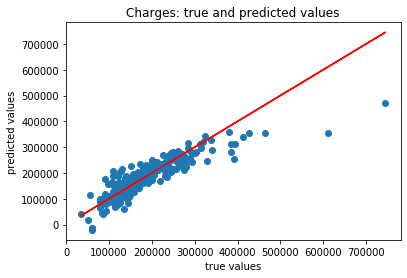

Mean absolute error of the prediction is: 25878.58175566762
Mean squared error of the prediction is: 1534433113.8206422
Root mean squared error of the prediction is: 39171.84082757207
Mean absolute percentage error of the prediction is: 15.99018209000595


In [26]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



Looking at the graph we can see that our model works pretty well at lower values. It looks like when our true values start to reach 400k and above our fit stops being as good.

In [27]:
houseprices_df['total_sf'] = houseprices_df['totalbsmtsf'] + houseprices_df['firstflrsf'] + houseprices_df['secondflrsf']
houseprices_df['qual_per_sf'] = houseprices_df['total_sf'] * houseprices_df['overallqual']

In [28]:
import statsmodels.api as sm
X2 = houseprices_df[['overallqual',
                    'grlivarea',
                    'garagecars',
                    'totalbsmtsf',
                    'dummy_centralair',
                    'total_sf',
                    'qual_per_sf'
                    ]]

Y2 = np.log(houseprices_df['saleprice'])

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()
# fit method estimates the coefficients using OLS
lrm.fit(X2, Y2)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


# We need to manually add a constant
# in statsmodels' sm
X2 = sm.add_constant(X2)

results = sm.OLS(Y2, X2).fit()

results.summary()


Coefficients: 
 [ 1.67695076e-01 -6.51658926e-05  1.05130478e-01 -1.47143583e-04
  1.94967736e-01  4.22739118e-04 -1.95538976e-05]

Intercept: 
 10.123321772957526


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     930.7
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:17:33   Log-Likelihood:                 511.35
No. Observations:                1460   AIC:                            -1007.
Df Residuals:                    1452   BIC:                            -964.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.1233      0.051    197.219      0.000      10.023      10.224
overallqual          0.1677      0.009     19.462      0.000       0.151       0.185
grlivarea        -6.517e-05    9.3e-05     -0.701      0.484      -0.000       0.000
garagecars           0.1051      0.008     13.505      0.000       0.090       0.120
totalbsmtsf         -0.0001   9.61e-05     -1.532      0.126      -0.000    4.13e-05
dummy_centralair     0.1950      0.019     10.061      0.000       0.157       0.233
total_sf             0.0004   9.69e-05      4.362      0.000       0.000       0.001
qual_per_sf      -1.955e-05   2.82e-06     -6.939      0.000   -2.51e-05    -1.4e-05
==============================================================================
Omnibus:                      532.726   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5136.922
Skew:                          -1.418   Prob(JB):                         0.00
Kurtosis:                      11.741   Cond. No.                     2.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X2_train.shape[0]))
print("The number of observations in test set is {}".format(X2_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


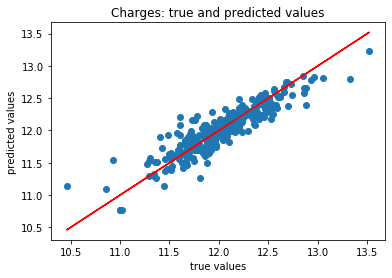

Mean absolute error of the prediction is: 25878.58175566762
Mean squared error of the prediction is: 1534433113.8206422
Root mean squared error of the prediction is: 39171.84082757207
Mean absolute percentage error of the prediction is: 15.99018209000595


In [30]:
# We add constant to the model as it's a best practice
# to do so every time!
X2_test = sm.add_constant(X2_test)

# We are making predictions here
y2_preds = results.predict(X2_test)

plt.scatter(y2_test, y2_preds)
plt.plot(y2_test, y2_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



All metrics point to the second model as being superior.

In [31]:
lrm = LinearRegression()

lrm.fit(X2_train, y2_train)

# We are making predictions here
y2_preds_train = lrm.predict(X2_train)
y2_preds_test = lrm.predict(X2_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X2_train, y2_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X2_test, y2_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y2_test, y2_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y2_test, y2_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y2_test, y2_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y2_test - y2_preds_test) / y2_test)) * 100))

R-squared of the model in training set is: 0.8171186354906427
-----Test set statistics-----
R-squared of the model in test set is: 0.8164806669626097
Mean absolute error of the prediction is: 0.1284905675456655
Mean squared error of the prediction is: 0.030601460049578505
Root mean squared error of the prediction is: 0.17493273006952845
Mean absolute percentage error of the prediction is: 1.0749418292242026


In [32]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(alpha=10**37) 
ridgeregr.fit(X2_train, y2_train)

# We are making predictions here
y2_preds_train = ridgeregr.predict(X2_train)
y2_preds_test = ridgeregr.predict(X2_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X2_train, y2_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X2_test, y2_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y2_test, y2_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y2_test, y2_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y2_test, y2_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y2_test - y2_preds_test) / y2_test)) * 100))


R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0013312764353405893
Mean absolute error of the prediction is: 0.3178263906622543
Mean squared error of the prediction is: 0.16696986930519447
Root mean squared error of the prediction is: 0.4086194676042668
Mean absolute percentage error of the prediction is: 2.6437833835698767


In [33]:
#when looking at the sample solution this came up. Not exactly sure what LassoCV does?
#I used the regressions that were given to me and they only made my models worse. the CV 
#somehow changes this along with the alphas list comprehension

from sklearn.linear_model import Lasso
#what is this alphas list comprehension doing for our purposes? 
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]
lassoregr = LassoCV(alphas=alphas, cv=5) 
lassoregr.fit(X2_train, y2_train)

# We are making predictions here
y2_preds_train = lassoregr.predict(X2_train)
y2_preds_test = lassoregr.predict(X2_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X2_train, y2_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X2_test, y2_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y2_test, y2_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y2_test, y2_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y2_test, y2_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y2_test - y2_preds_test) / y2_test)) * 100))


R-squared of the model on the training set is: 0.8171178122953411
-----Test set statistics-----
R-squared of the model on the test set is: 0.8165075077492122
Mean absolute error of the prediction is: 0.12847955801211627
Mean squared error of the prediction is: 0.030596984405267234
Root mean squared error of the prediction is: 0.17491993712915413
Mean absolute percentage error of the prediction is: 1.0748455938776296


In [34]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = RidgeCV(alphas=alphas, cv=5) 
ridgeregr.fit(X2_train, y2_train)

# We are making predictions here
y2_preds_train = ridgeregr.predict(X2_train)
y2_preds_test = ridgeregr.predict(X2_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X2_train, y2_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X2_test, y2_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y2_test, y2_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y2_test, y2_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y2_test, y2_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y2_test - y2_preds_test) / y2_test)) * 100))


R-squared of the model on the training set is: 0.8171186354906426
-----Test set statistics-----
R-squared of the model on the test set is: 0.8164806669626297
Mean absolute error of the prediction is: 0.12849056754566457
Mean squared error of the prediction is: 0.03060146004957516
Root mean squared error of the prediction is: 0.1749327300695189
Mean absolute percentage error of the prediction is: 1.0749418292241992


In [35]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**21, l1_ratio=0.5) 
elasticregr.fit(X2_train, y2_train)

# We are making predictions here
y2_preds_train = elasticregr.predict(X2_train)
y2_preds_test = elasticregr.predict(X2_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X2_train, y2_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X2_test, y2_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y2_test, y2_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y2_test, y2_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y2_test, y2_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y2_test - y2_preds_test) / y2_test)) * 100))


R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0013312764353405893
Mean absolute error of the prediction is: 0.3178263906622543
Mean squared error of the prediction is: 0.16696986930519447
Root mean squared error of the prediction is: 0.4086194676042668
Mean absolute percentage error of the prediction is: 2.6437833835698767


In [36]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNetCV(alphas=alphas, cv=5) 
elasticregr.fit(X2_train, y2_train)

# We are making predictions here
y2_preds_train = elasticregr.predict(X2_train)
y2_preds_test = elasticregr.predict(X2_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X2_train, y2_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X2_test, y2_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y2_test, y2_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y2_test, y2_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y2_test, y2_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y2_test - y2_preds_test) / y2_test)) * 100))


R-squared of the model on the training set is: 0.8171178122952927
-----Test set statistics-----
R-squared of the model on the test set is: 0.8165075077174614
Mean absolute error of the prediction is: 0.12847955803180333
Mean squared error of the prediction is: 0.030596984410561634
Root mean squared error of the prediction is: 0.1749199371442879
Mean absolute percentage error of the prediction is: 1.0748455940446968


When looking at all the available options, they seem to be pretty similar. Ridge regression is slightly worse on the test set